### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [93]:
print("I Wayan Rangga Rijasa - 0706022210019")

I Wayan Rangga Rijasa - 0706022210019


In [46]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [47]:
#1
url = 'https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv'
dataset = pd.read_csv(url)
dataset.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [48]:
#2
dataset.info()

#conclusion
print("In conclusion there is 10 columns with 6194 values each, except 1 column where there is only 4352 value which shows the presence of missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
In conclusion there is 10 columns with 6194 values each, except 1 column where there is only 4352 value which shows the presence of missing values


3. display the number of each unique value in the race and admission columns (including NaN)

In [49]:
#3a
a = dataset['admission'].value_counts(dropna=False)
print(a)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [50]:
#3b
b = dataset['race'].value_counts(dropna=False)
print(b)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [51]:
#4
dataset['admission'].fillna('deny',inplace=True)
dataset['race'].fillna('other',inplace=True)

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_14192\3055586768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['admission'].fillna('deny',inplace=True)
C:\Users\Rangga R\AppData\Local\Temp\ipykernel_14192\3055586768.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

5. recheck missing value

In [52]:
#5
a = dataset.isnull().sum()
a

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [53]:
# 6
a = dataset.drop('application_id', axis=1, inplace=True)
a

7. show describe column and conclude what the insight is from that column

In [54]:
#7

a = dataset.describe()
print(a)
#conclusion
print('in conlusion, with the average gpa of 3.2 an average applicant will have work experience of around 5 years ')

               gpa         gmat     work_exp
count  6194.000000  6194.000000  6194.000000
mean      3.250714   651.092993     5.016952
std       0.151541    49.294883     1.032432
min       2.650000   570.000000     1.000000
25%       3.150000   610.000000     4.000000
50%       3.250000   650.000000     5.000000
75%       3.350000   680.000000     6.000000
max       3.770000   780.000000     9.000000
in conlusion, with the average gpa of 3.2 an average applicant will have work experience of around 5 years 


8. make a visualization to analyze admission status based on major and explain the conclusions

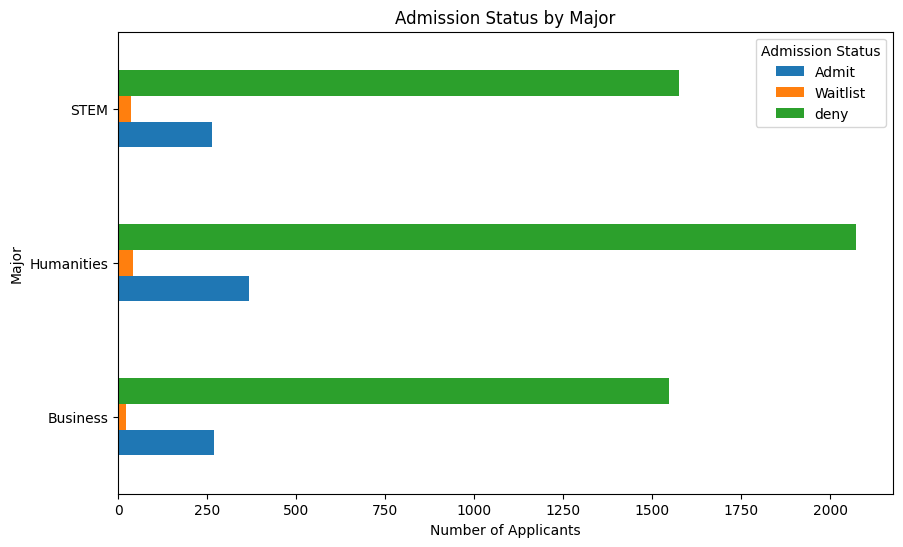

In [66]:
#8

count_admission_by_major = dataset.groupby(['major',
'admission'])['admission'].count().unstack()

count_admission_by_major.plot (kind='barh', figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()

#in conclusion alot of the majors is denied admission regardless of gpa score

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

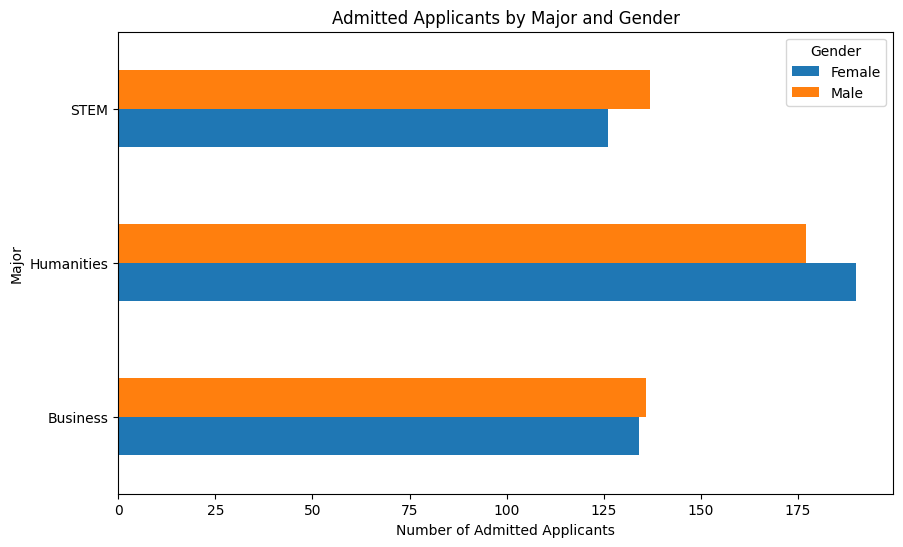

In [60]:
#9

admitted_df = dataset[dataset['admission'] == 'Admit']

count_major_by_gender = admitted_df.groupby(['major',
'gender'])['gender'].count().unstack()

count_major_by_gender.plot (kind='barh', figsize=(10,6))
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.show()

#in conclusion stem and business admits more male applicants while Humanities admits more female applicants

10. create your own insightful visualization and explain it in at least 2 sentences

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_14192\1771195846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y='gmat', data=dataset, palette='Set2')


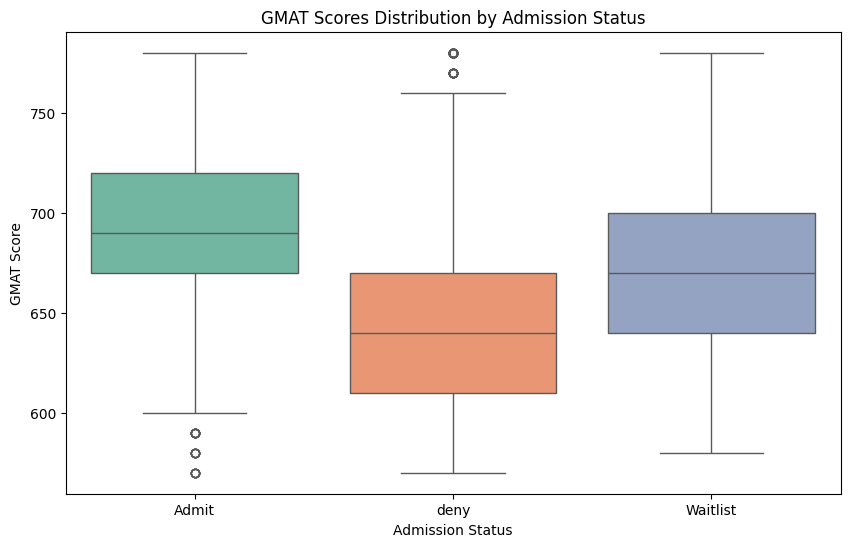

In [65]:
#10
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='admission', y='gmat', data=dataset, palette='Set2')


plt.title('GMAT Scores Distribution by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GMAT Score')


plt.show()

#using this boxplot shows that admitted applicant, on average have higher GMAT scores than applicant who are denied. But this boxplot also shows that 
#waitlisted applicants have on average the GMAT score between those who got admitted and denied

11. create your own insightful visualization and explain it in at least 2 sentences

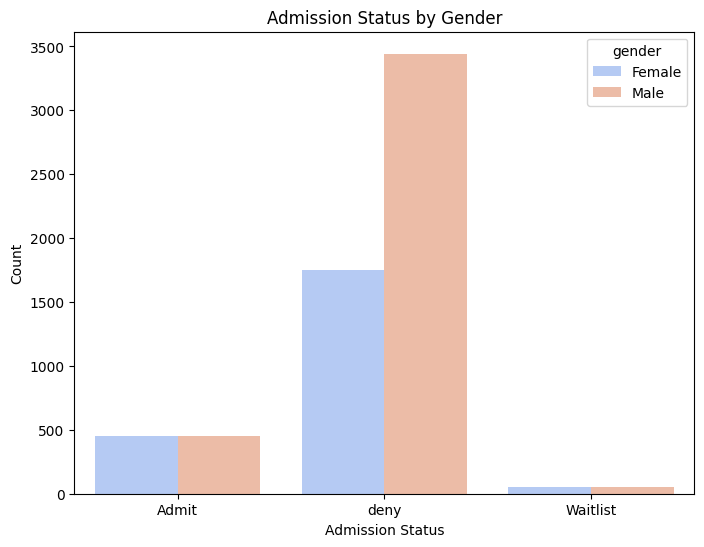

In [67]:
#11

plt.figure(figsize=(8, 6))
sns.countplot(x='admission', hue='gender', data=df, palette='coolwarm')


plt.title('Admission Status by Gender')
plt.xlabel('Admission Status')
plt.ylabel('Count')


plt.show()

#This bar chart shows that males dominated the denied admission status. But this bar chart also shows that male-female is more-or-less equal 
#in both admitted and waitlisted status

12. encode categorical columns and display the results

In [71]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['gender'] = encoder.fit_transform(dataset['gender'])
dataset['international'] = encoder.fit_transform(dataset['international'])
dataset['major'] = encoder.fit_transform(dataset['major'])
dataset['race'] = encoder.fit_transform(dataset['race'])
dataset['work_exp'] = encoder.fit_transform(dataset['work_exp'])
dataset['work_industry'] = encoder.fit_transform(dataset['work_industry'])

dataset.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [72]:
#12b
#encode y

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['admission'] = encoder.fit_transform(dataset['admission'])
dataset['admission'] = dataset['admission'].replace({2: 1})
dataset.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,1
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,1
4,1,0,3.35,2,2,590.0,4,1,1


13. create a heatmap to see the correlation and explain the conclusion

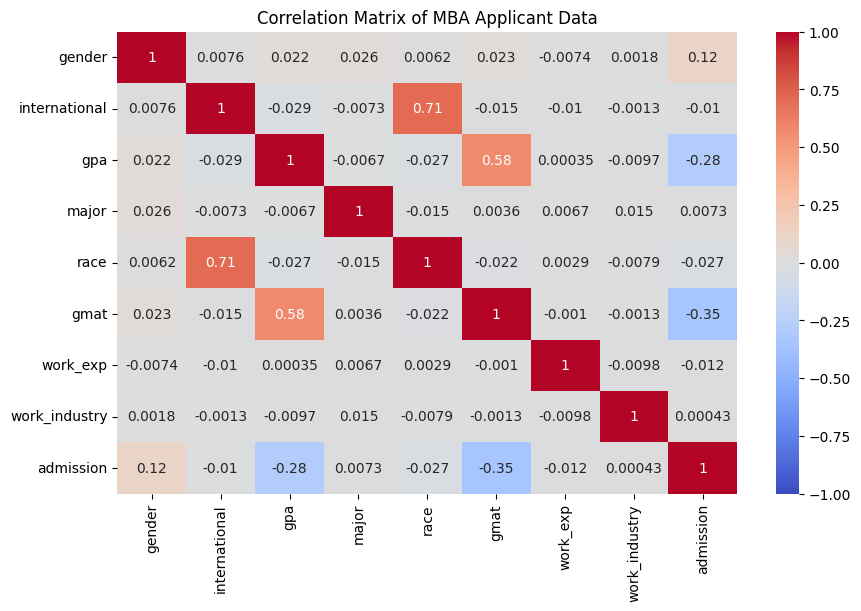


The correlation matrix highlights several key relationships among the variables in the MBA applicant data. There is a moderate positive correlation between GMAT and GPA (0.58), indicating that applicants with higher GPAs tend to have higher GMAT scores. However, both GMAT (-0.35) and GPA (-0.28) show a negative correlation with admission status, suggesting that these scores alone do not guarantee admission. The strong correlation between race and international status (0.71) reflects the diversity among international applicants. Additionally, factors such as work experience and industry show little influence on admission decisions, implying that these may not be as significant in the selection process. This matrix helps identify areas for further analysis in understanding admission patterns.


In [74]:
#13

import seaborn as sns
corr_matrix = dataset.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()
#Conclusion
print()
print("The correlation matrix highlights several key relationships among the variables in the MBA applicant data. There is a moderate positive correlation between GMAT and GPA (0.58), indicating that applicants with higher GPAs tend to have higher GMAT scores. However, both GMAT (-0.35) and GPA (-0.28) show a negative correlation with admission status, suggesting that these scores alone do not guarantee admission. The strong correlation between race and international status (0.71) reflects the diversity among international applicants. Additionally, factors such as work experience and industry show little influence on admission decisions, implying that these may not be as significant in the selection process. This matrix helps identify areas for further analysis in understanding admission patterns.")

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [92]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = dataset[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = dataset['admission']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

mean = dataset['gpa'].mean()
# print(mean)
predicted_role_encoded = clf.predict([[0,0,mean,0,0,580,2,3]])
predicted_role = encoder.inverse_transform(predicted_role_encoded)

print(f"Predicted role for the character: {predicted_role[0]}")
print('in conclusion lisa needs to improve herself to be accepted')

Accuracy of the model: 0.8095238095238095
Predicted role for the character: Waitlist
in conclusion lisa needs to improve herself to be accepted


C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
